# Bag Of N-Grams: Exercise

* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than Real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

* Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

## About Data: Fake News Detection
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* This data consists of two columns. - Text - label

* Text is the statements or messages regarding a particular event/situation.

* Label feature tells whether the given Text is Fake or Real.

* As there are only 2 classes, this problem comes under the Binary Classification.

In [2]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
print(df.head(5))

(9900, 2)
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real


In [3]:
#check the distribution of labels
df.label.value_counts()

,count
label,
Fake,5000
Real,4900


In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels
df['label_num'] = df.label.map({'Fake' : 0, 'Real' : 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


## Modelling without Pre-processing Text data

In [5]:
#import train-test-split from sklearn
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [6]:
#print the shapes of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(7920,)
(1980,)


### Attempt 1 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with unigram, bigram, and trigrams.
* Use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
* Print the classification report.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_gram', CountVectorizer(ngram_range = (1,3))),
    ('knn', KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean'))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.73      0.72      1980
weighted avg       0.81      0.73      0.72      1980



### Attempt 2 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with unigram, bigram, and trigrams.
* Use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
* Print the classification report.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_gram', CountVectorizer(ngram_range = (1,3))),
    ('knn', KNeighborsClassifier(n_neighbors = 10, metric = 'cosine'))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



### Attempt 3 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with trigrams.
* Use RandomForest as the classifier
* Print the classification report.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_3_gram', CountVectorizer(ngram_range = (3,3))),
    ('rf', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1000
           1       0.50      1.00      0.66       980

    accuracy                           0.50      1980
   macro avg       0.75      0.50      0.33      1980
weighted avg       0.75      0.50      0.33      1980



### Attempt 4 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with unigram and bigrams.
* Use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
* Print the classification report.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1,2))),
    ('nb', MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [11]:
#use this utility function to get the preprocessed text data
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [12]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [13]:
#print the top 5 rows
df.head(5)

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump surrogate BRUTALLY Stabs Pathetic VIDE...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


#### Build a model with pre processed text

In [14]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

### Attempt 1 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with trigrams.
* Use RandomForest as the classifier
* Print the classification report.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_3_gram', CountVectorizer(ngram_range = (3,3))),
    ('rf', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1000
           1       0.99      0.93      0.96       980

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



### Attempt 2 :

1. Using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

* Using CountVectorizer with unigram, bigram and trigrams.
* Use RandomForest as the classifier
* Print the classification report.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_gram', CountVectorizer(ngram_range = (1,3))),
    ('rf', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [18]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1000,    0],
       [   3,  977]])

Text(95.72222222222221, 0.5, 'Truth')

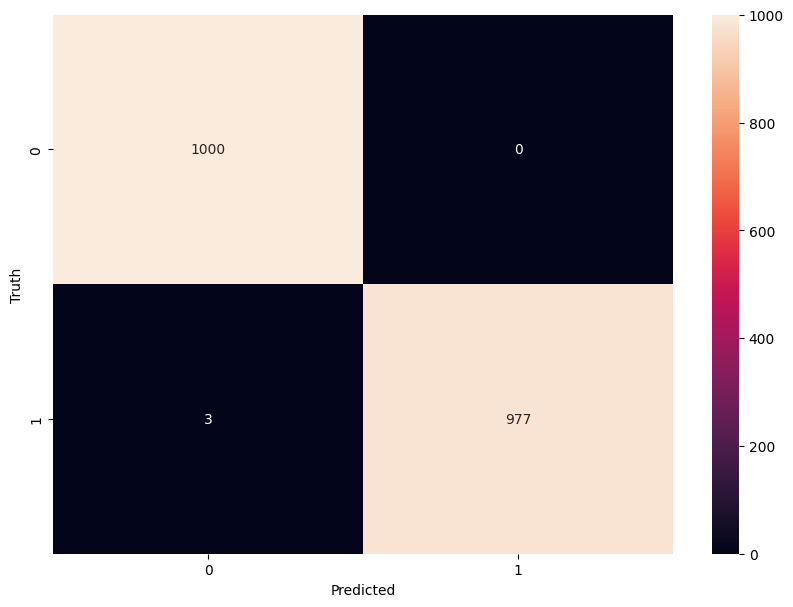

In [20]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Observations:

* As the ngram_range increase, the number of dimensions/features also increases and models have the risk of overfitting and result in terrible performance.

* Models like KNN dowsn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.